In [15]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

import math
import numpy as np
import torch as t
import torch.utils.data as tdata
import matplotlib.pyplot as plt
from einops import rearrange

from dots.training import *
from dots.trainhooks import *
from dots.models import MLP
from dots.dots import *
from dots.utils import *
from dots.plotting import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
def get_model(wandb_run_name):
    return t.load(
        f"../models/{wandb_run_name}.pt",
        map_location=get_device())

# good relu

In [3]:
good_relu = get_model("mild-sweep-3")

In [4]:
good_relu

MLP(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [5]:
list(good_relu.parameters())

[Parameter containing:
 tensor([[-0.1923],
         [ 0.4593],
         [-0.7197],
         [-0.3387],
         [-0.7292],
         [-0.0743],
         [ 0.2783],
         [-0.9279],
         [-1.4241],
         [-0.2442]], requires_grad=True),
 Parameter containing:
 tensor([-2.7413e-01,  4.5852e-01,  7.1943e-01,  3.3860e-01, -7.8919e-01,
         -2.0376e-01,  3.7681e-01,  9.2642e-01, -2.6128e-06, -5.7862e-01],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.0909,  0.6332, -0.4842, -0.1158,  0.0303,  0.0342, -0.0055, -0.3481,
           0.7022, -0.1073]], requires_grad=True),
 Parameter containing:
 tensor([0.4218], requires_grad=True)]

/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


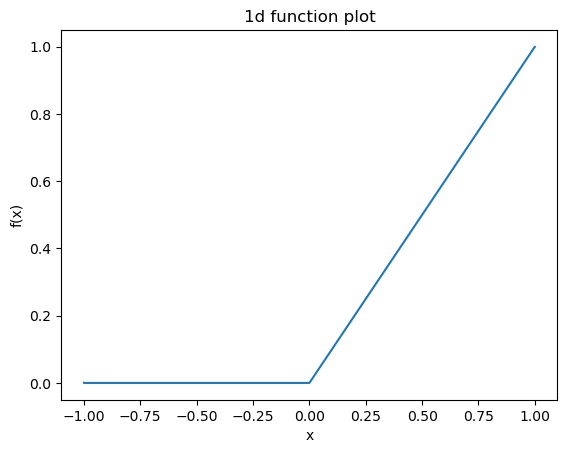

In [6]:
plot_1d_fn(good_relu, -1, 1, 1000)

# best hfsin

In [10]:
hfsin = get_model("fancy-sweep-64")

In [17]:
hfsin.count_params()

8513

In [18]:
hfsin

MLP(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)

/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


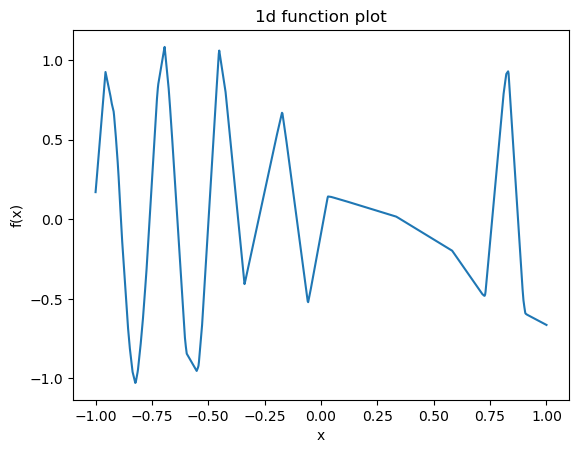

In [11]:
plot_1d_fn(hfsin)

/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:108: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


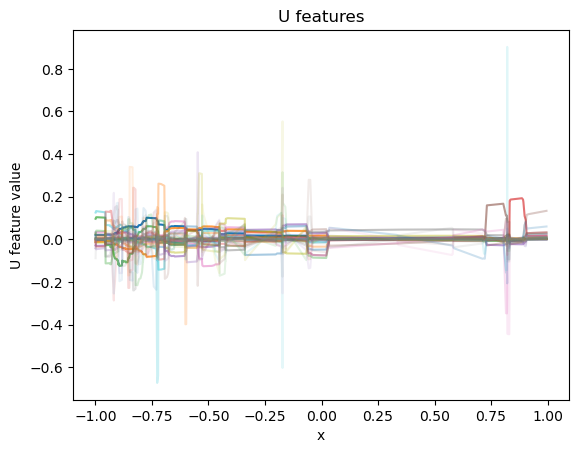

In [12]:
plot_1d_u_feats(hfsin, range_batch(-1, 1, 1000, sort=True))

Assuming trainplot_1d got a model, not a trainstate


/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


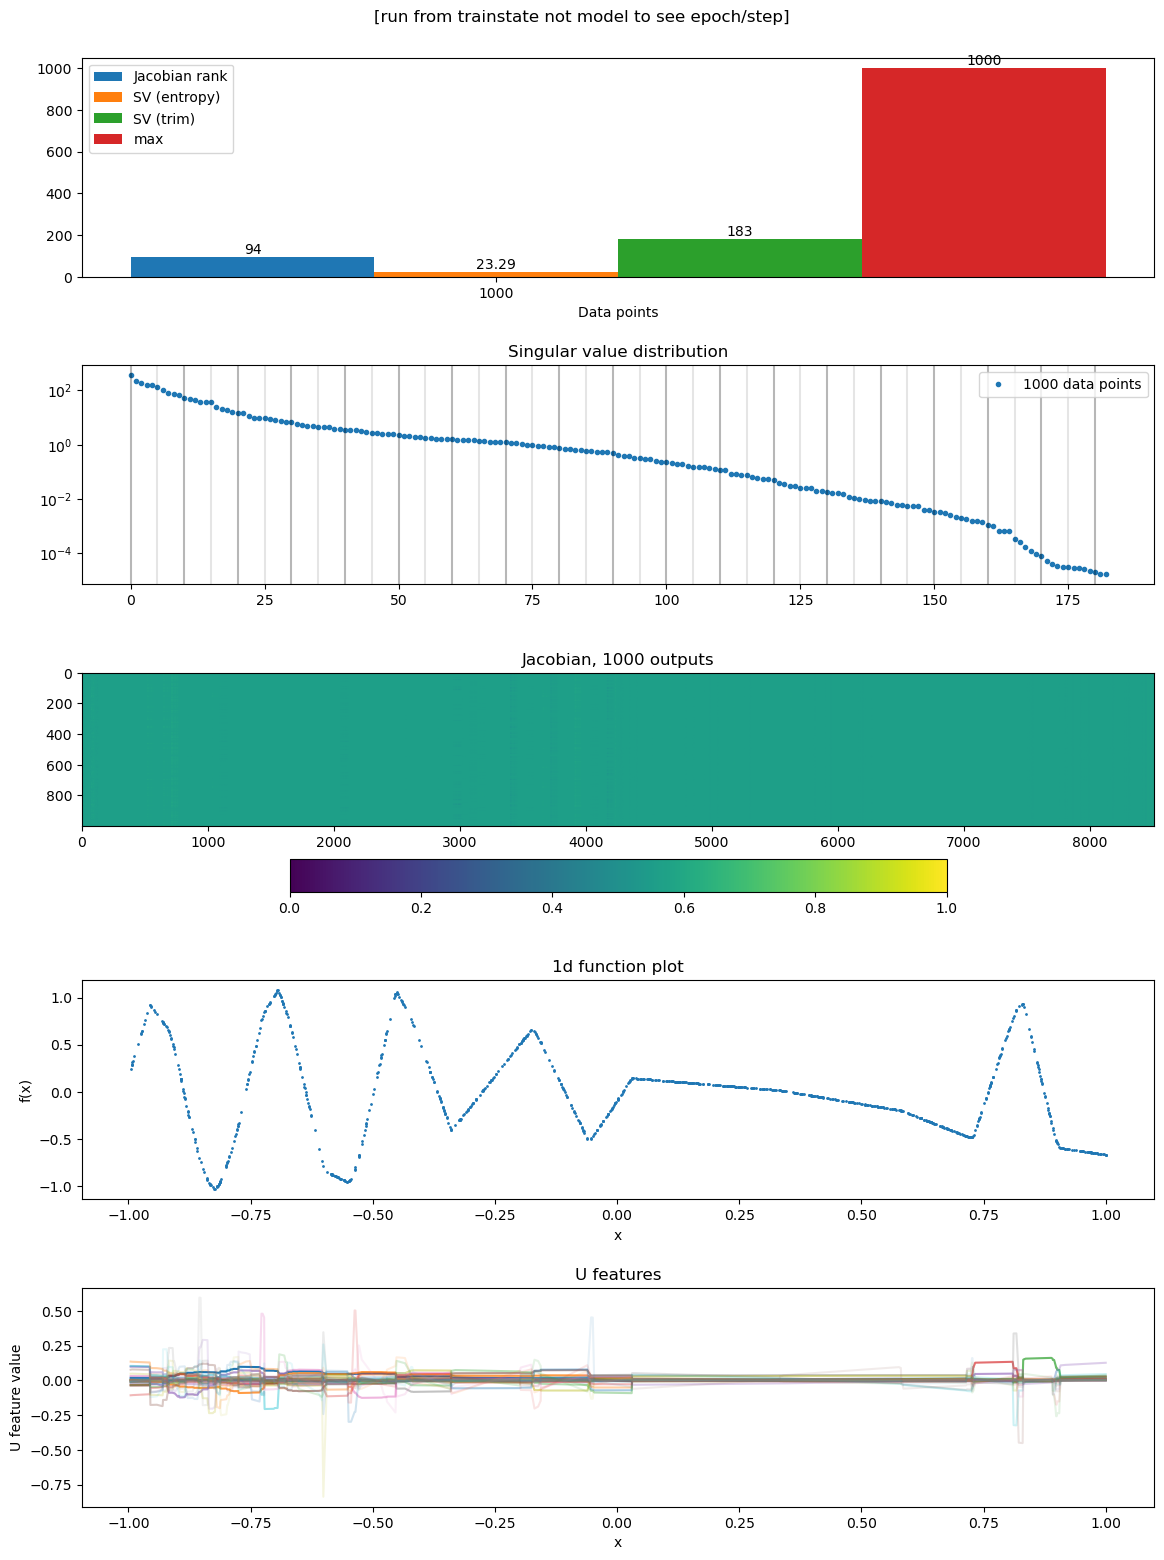

In [19]:
fig = trainplot_1d(hfsin)

# Good square

In [20]:
square = get_model("worthy-sweep-32")

In [30]:
square

MLP(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=1, bias=True)
  )
)

/home/lrudl/Dropbox/Rudolf/Cambridge/22-23/dots/dots/notebooks/../dots/plotting.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


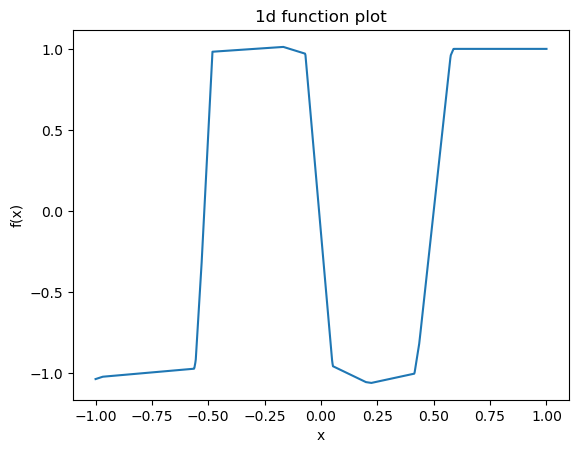

In [21]:
plot_1d_fn(square)

Assuming trainplot_1d got a model, not a trainstate


/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(
/home/lrudl/miniconda3/envs/dots_env/lib/python3.10/site-packages/torch/nn/utils/stateless.py:216: UserWarning: This API is deprecated as of PyTorch 2.0 and will be removed in a future version of PyTorch. Please use torch.func.functional_call instead which is a drop-in replacement for this API.
  warnings.warn(


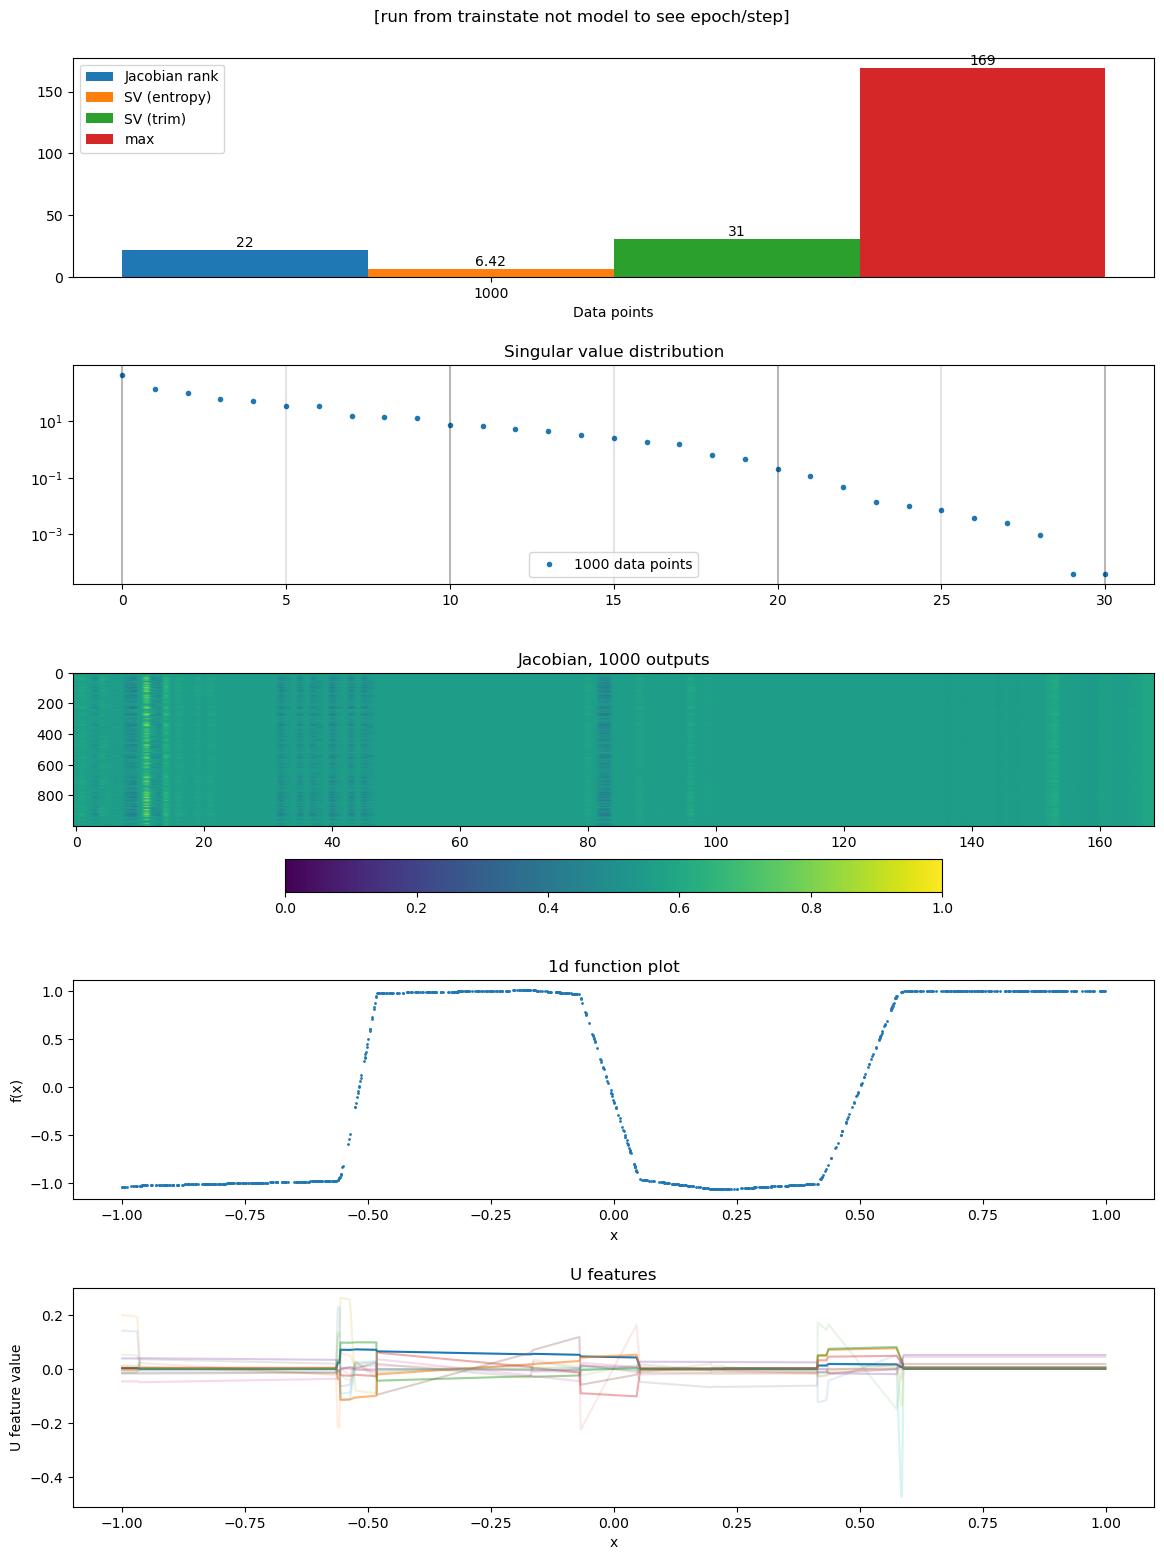

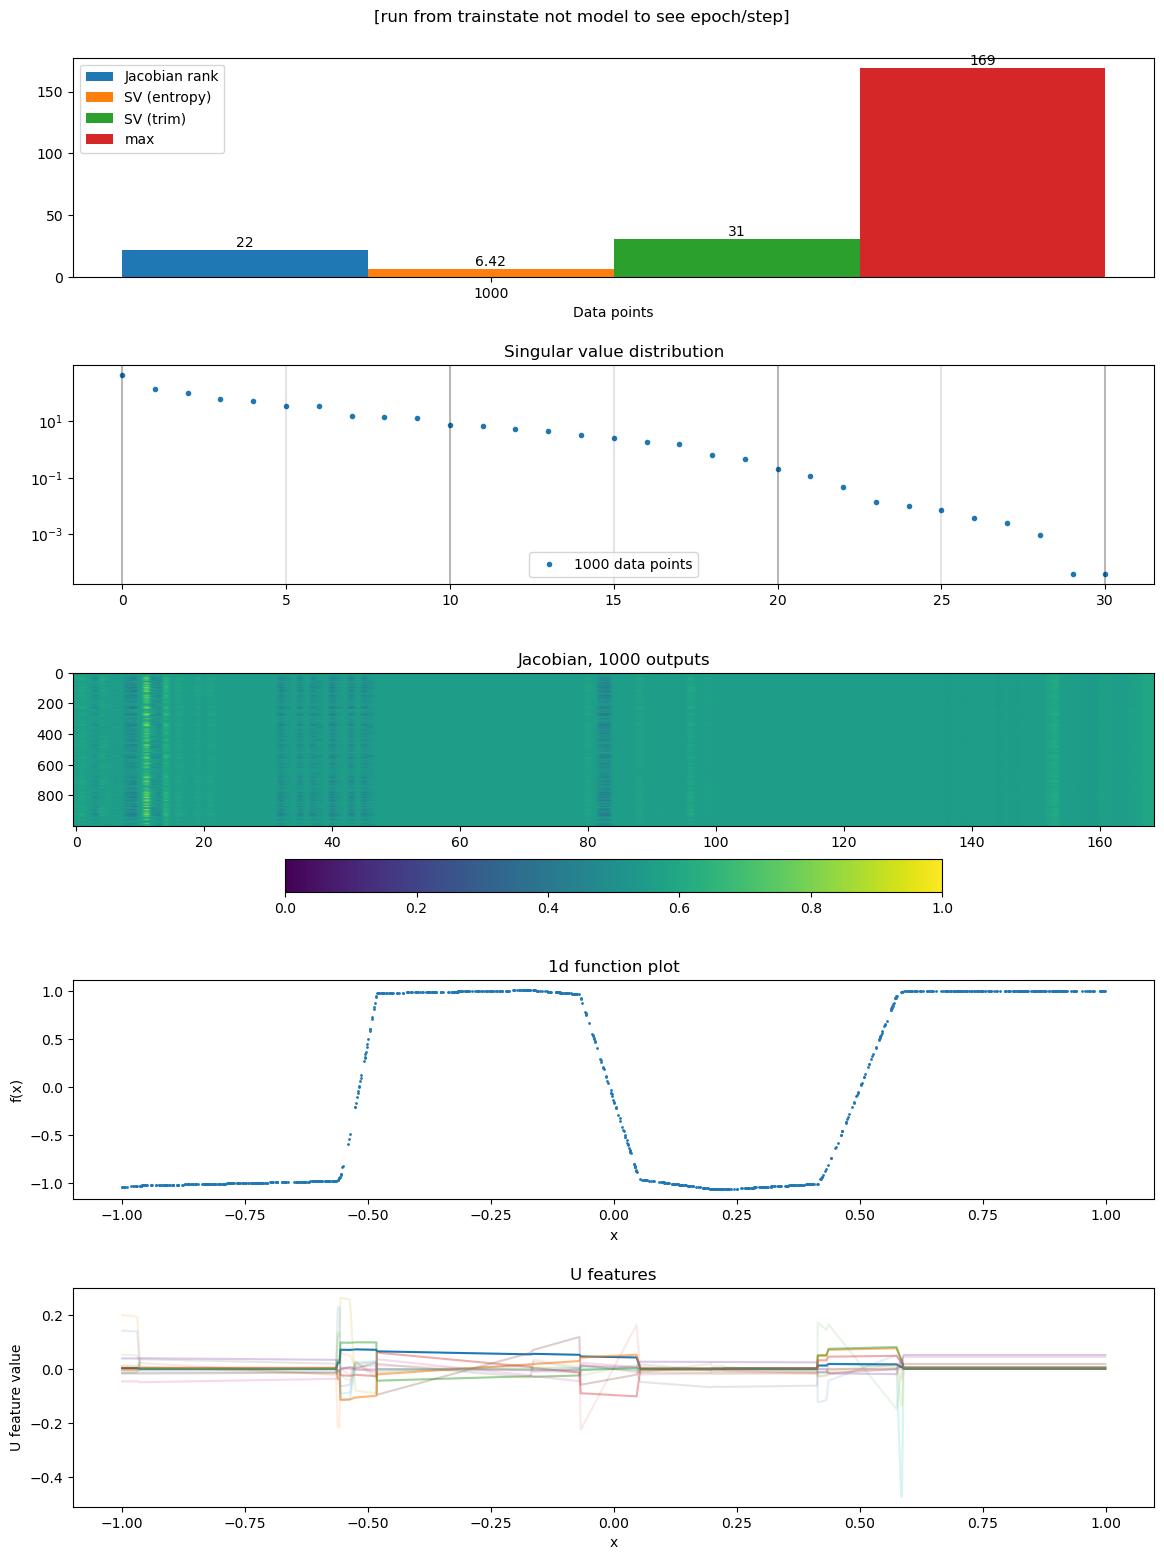

In [22]:
trainplot_1d(square)

In [27]:
jac = square.matrix_jacobian(range_batch(-1, 1, 1000, sort=True))